In [39]:
# Biblio
# http://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/
# https://datatofish.com/k-means-clustering-python/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min, silhouette_score
import os
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [40]:
# Constantes
FICHERO = 'Medias_Y_Coeficientes_Hogares.csv'
RUTA_ACTUAL = os.path.dirname(os.path.realpath('__file__'))
DIRECTORIO_GUARDADO_IMG = 'IMG_CLUSTER'
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [41]:
def silhouette_valor(clusters, X):
    kmeans_sil = KMeans(n_clusters=clusters).fit(X)
    labels_sil = kmeans_sil.predict(X)
    silhouette_media = silhouette_score(X, labels_sil)
    print("Para ", clusters, " clusteres. La puntuación de silhouette es: ", silhouette_media.round(2))

In [42]:
def obtener_coef_proporcion(fichero):
    # Obtener el coeficiente y la proporcion
    dataframeData = pd.read_csv('Medias_Y_Coeficientes_Hogares.csv', delimiter = ',')
    dataframeData.set_index('Hogar')
    dataframeData = dataframeData.drop(columns=['stdRango 00-06', 'meanRango 00-06','stdRango 06-12','stdRango 06-12','meanRango 06-12','coefRango 06-12','stdRango 12-18','meanRango 12-18','coefRango 12-18','stdRango 18-00','meanRango 18-00','coefRango 18-00'])
    df = pd.DataFrame() 
    df['Hogar']=dataframeData['Hogar']
    df['coef_r0']=dataframeData['coefRango 00-06']
    df['proporc_r0']=dataframeData['prop. 00-06 resto']
    X = np.array(df[['proporc_r0','coef_r0']])
    #X.shape
    return X, df

In [43]:
def kmeans(X):
    kmeans = KMeans(n_clusters=2).fit(X)
    centroides = kmeans.cluster_centers_
    etiquetas = kmeans.predict(X)
    return kmeans, centroides, etiquetas

In [44]:
def calculo_silouette(X):
    clusters_range = [2, 3, 4, 5, 6]
    for clusters in clusters_range:
        silhouette_valor(clusters, X)

In [45]:
def obtenerCategorias(df):
    resultados =  pd.DataFrame()
    resultados['Hogar'] = df['Hogar']
    resultados['Kmeans_Cat'] = etiquetas
    cat_hogares.to_csv('CategoriasKmeans.csv', sep=',', encoding='utf-8')
    return resultados

In [46]:
def guardarGraficaKmeans(df, centroides):
    plt.scatter(df['proporc_r0'],df['coef_r0'],c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=50)
    plt.title('Relación (coeficiente variabilidad - Proporción consumo energía) \n Para rango horario 00-06h')
    plt.xlabel('Proporción consumo', fontsize = 16)
    plt.ylabel('Coeficiente Variabilidad', fontsize = 16)
    fichero = os.path.join(RUTA_ACTUAL, DIRECTORIO_GUARDADO_IMG, 'Kmeans_rango_horario' + '.png')
    plt.savefig(fichero)  

In [47]:
X, df = obtener_coef_proporcion(FICHERO)

In [48]:
calculo_silouette(X)

Para  2  clusteres. La puntuación de silhouette es:  0.61
Para  3  clusteres. La puntuación de silhouette es:  0.54
Para  4  clusteres. La puntuación de silhouette es:  0.54
Para  5  clusteres. La puntuación de silhouette es:  0.41
Para  6  clusteres. La puntuación de silhouette es:  0.39


In [49]:
kmeans, centroides, etiquetas = kmeans(X)

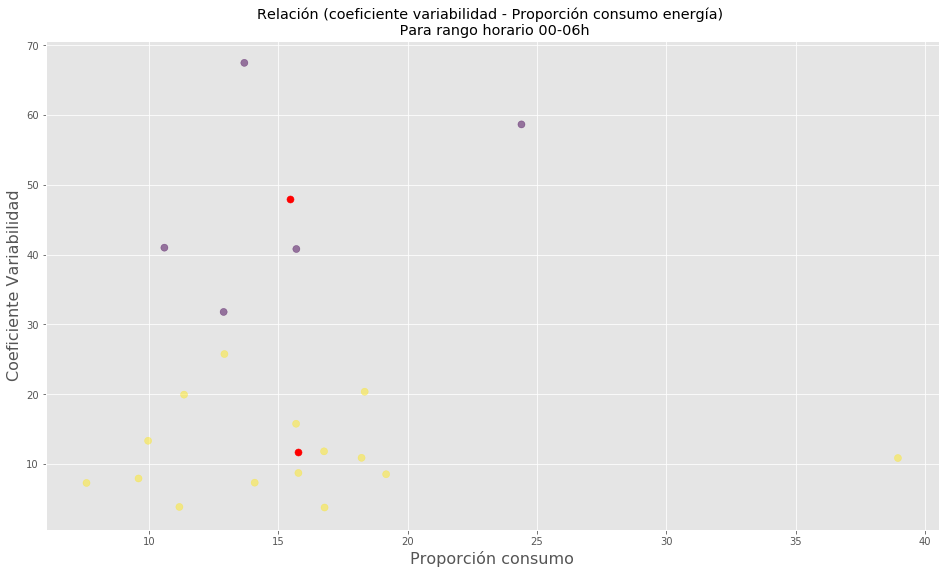

In [50]:
guardarGraficaKmeans(df, centroides)

In [53]:
cat_hogares = obtenerCategorias(df)
cat_hogares

,Hogar,Kmeans_Cat
0,1,0
1,2,0
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,0
